In [1]:
import collections
from datetime import datetime
import pandas as pd
from vnpy.app.cta_strategy.backtesting import BacktestingEngine, OptimizationSetting
from vnpy.app.cta_strategy.strategies.demo_strategy import DemoStrategy

In [2]:
engine = BacktestingEngine()
engine.set_parameters(
    vt_symbol="MGC.NYMEX",
    interval="1m",
    start=datetime(2007, 12, 12),
    end=datetime(2020, 5, 1),
    rate=0.000028,
    slippage=0.1,
    size=10,
    pricetick=0.1,
    capital=20000,
    collection_name = "MGC"
)
engine.load_data()

2020-06-02 22:02:02.265618	开始加载历史数据
2020-06-02 22:02:02.270615	加载进度： [1%]
2020-06-02 22:02:02.271614	加载进度： [1%]
2020-06-02 22:02:02.273614	加载进度： [2%]
2020-06-02 22:02:02.275613	加载进度： [3%]
2020-06-02 22:02:02.276612	加载进度： [3%]
2020-06-02 22:02:02.278614	加载进度： [4%]
2020-06-02 22:02:02.280611	加载进度： [5%]
2020-06-02 22:02:02.281610	加载进度： [5%]
2020-06-02 22:02:02.283610	加载进度： [6%]
2020-06-02 22:02:02.285608	加载进度： [7%]
2020-06-02 22:02:02.286607	加载进度： [7%]
2020-06-02 22:02:02.288606	加载进度： [8%]
2020-06-02 22:02:02.290605	加载进度： [9%]
2020-06-02 22:02:02.291606	加载进度： [9%]
2020-06-02 22:02:02.293605	加载进度： [10%]
2020-06-02 22:02:02.295605	加载进度：# [11%]
2020-06-02 22:02:02.296604	加载进度：# [11%]
2020-06-02 22:02:02.298604	加载进度：# [12%]
2020-06-02 22:02:02.300603	加载进度：# [13%]
2020-06-02 22:02:02.302602	加载进度：# [13%]
2020-06-02 22:02:02.303600	加载进度：# [14%]
2020-06-02 22:02:02.305599	加载进度：# [15%]
2020-06-02 22:02:02.307599	加载进度：# [15%]
2020-06-02 22:02:02.308599	加载进度：# [16%]
2020-06-02 22:02:02.310598	加载进度：#

In [3]:
class_dict = collections.defaultdict(list)
for class_instance in engine.history_data:
    for key, value in class_instance.__dict__.items():
        class_dict[key].append(value)
frame = pd.DataFrame.from_dict(class_dict)

In [4]:
frame.head(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
0,DB,MGC,Exchange.NYMEX,2011-03-25 00:12:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
1,DB,MGC,Exchange.NYMEX,2011-03-25 01:29:00,Interval.MINUTE,2.0,0.0,1434.7,1434.7,1434.7,1434.7,MGC.NYMEX
2,DB,MGC,Exchange.NYMEX,2011-03-25 01:33:00,Interval.MINUTE,1.0,0.0,1434.5,1434.5,1434.5,1434.5,MGC.NYMEX
3,DB,MGC,Exchange.NYMEX,2011-03-25 02:28:00,Interval.MINUTE,1.0,0.0,1436.5,1436.5,1436.5,1436.5,MGC.NYMEX
4,DB,MGC,Exchange.NYMEX,2011-03-25 03:02:00,Interval.MINUTE,1.0,0.0,1436.2,1436.2,1436.2,1436.2,MGC.NYMEX


In [5]:
frame.tail(5)

,gateway_name,symbol,exchange,datetime,interval,volume,open_interest,open_price,high_price,low_price,close_price,vt_symbol
1189589,DB,MGC,Exchange.NYMEX,2020-01-31 12:33:00,Interval.MINUTE,2.0,0.0,1456.6586,1456.6586,1455.7385,1455.7385,MGC.NYMEX
1189590,DB,MGC,Exchange.NYMEX,2020-01-31 12:36:00,Interval.MINUTE,2.0,0.0,1457.7627,1457.7627,1457.7627,1457.7627,MGC.NYMEX
1189591,DB,MGC,Exchange.NYMEX,2020-01-31 15:22:00,Interval.MINUTE,5.0,0.0,1459.8789,1459.8789,1459.8789,1459.8789,MGC.NYMEX
1189592,DB,MGC,Exchange.NYMEX,2020-01-31 15:24:00,Interval.MINUTE,5.0,0.0,1460.2469,1460.2469,1460.2469,1460.2469,MGC.NYMEX
1189593,DB,MGC,Exchange.NYMEX,2020-01-31 15:59:00,Interval.MINUTE,1.0,0.0,1459.0508,1459.0508,1459.0508,1459.0508,MGC.NYMEX


Set optimization params

target name should be one of the statistics below:
```python
{
            "start_date": start_date,
            "end_date": end_date,
            "total_days": total_days,
            "profit_days": profit_days,
            "loss_days": loss_days,
            "capital": self.capital,
            "end_balance": end_balance,
            "max_drawdown": max_drawdown,
            "max_ddpercent": max_ddpercent,
            "max_drawdown_duration": max_drawdown_duration,
            "total_net_pnl": total_net_pnl,
            "daily_net_pnl": daily_net_pnl,
            "total_commission": total_commission,
            "daily_commission": daily_commission,
            "total_slippage": total_slippage,
            "daily_slippage": daily_slippage,
            "total_turnover": total_turnover,
            "daily_turnover": daily_turnover,
            "total_trade_count": total_trade_count,
            "daily_trade_count": daily_trade_count,
            "total_return": total_return,
            "annual_return": annual_return,
            "daily_return": daily_return,
            "return_std": return_std,
            "sharpe_ratio": sharpe_ratio,
            "return_drawdown_ratio": return_drawdown_ratio,
        }
```

In [11]:
demo_strategy_op_setting = OptimizationSetting()
demo_strategy_op_setting.add_parameter(
    "fast_window",
    2.0,
    20.0,
    7.0
)
demo_strategy_op_setting.add_parameter(
    "slow_window",
    20.0,
    100.0,
    20.0
)
demo_strategy_op_setting.set_target("total_return")

In [12]:
engine.add_strategy(DemoStrategy, {})

In [13]:
optimize_result = engine.run_optimization(demo_strategy_op_setting)

2020-06-02 22:56:31.897650	参数：{'fast_window': 2.0, 'slow_window': 100.0}, 目标：0
2020-06-02 22:56:31.897650	参数：{'fast_window': 9.0, 'slow_window': 100.0}, 目标：0
2020-06-02 22:56:31.897650	参数：{'fast_window': 16.0, 'slow_window': 100.0}, 目标：0
2020-06-02 22:56:31.897650	参数：{'fast_window': 16.0, 'slow_window': 80.0}, 目标：-262.43633293348
2020-06-02 22:56:31.897650	参数：{'fast_window': 16.0, 'slow_window': 60.0}, 目标：-320.119069832718
2020-06-02 22:56:31.897650	参数：{'fast_window': 9.0, 'slow_window': 80.0}, 目标：-345.3040533438786
2020-06-02 22:56:31.897650	参数：{'fast_window': 9.0, 'slow_window': 60.0}, 目标：-393.87797592359647
2020-06-02 22:56:31.897650	参数：{'fast_window': 16.0, 'slow_window': 40.0}, 目标：-453.9701694005978
2020-06-02 22:56:31.897650	参数：{'fast_window': 9.0, 'slow_window': 40.0}, 目标：-539.2994335155204
2020-06-02 22:56:31.897650	参数：{'fast_window': 2.0, 'slow_window': 80.0}, 目标：-799.4421939374804
2020-06-02 22:56:31.897650	参数：{'fast_window': 2.0, 'slow_window': 60.0}, 目标：-901.0207469169227
2

In [15]:
engine.add_strategy(DemoStrategy, {"fast_window":16, "slow_window":80})
engine.run_backtesting()
df = engine.calculate_result()
engine.calculate_statistics()

2020-06-02 23:24:57.866869	策略初始化完成
2020-06-02 23:24:57.866869	开始回放历史数据
2020-06-02 23:25:33.380420	历史数据回放结束
2020-06-02 23:25:33.381419	开始计算逐日盯市盈亏
2020-06-02 23:25:33.540099	逐日盯市盈亏计算完成
2020-06-02 23:25:33.542098	开始计算策略统计指标
2020-06-02 23:25:33.560089	------------------------------
2020-06-02 23:25:33.560089	首个交易日：	2011-04-06
2020-06-02 23:25:33.560089	最后交易日：	2011-04-05
2020-06-02 23:25:33.561089	总交易日：	2745
2020-06-02 23:25:33.561089	盈利交易日：	1033
2020-06-02 23:25:33.562089	亏损交易日：	1631
2020-06-02 23:25:33.562089	起始资金：	20,000.00
2020-06-02 23:25:33.562089	结束资金：	-32,376.20
2020-06-02 23:25:33.563089	总收益率：	-261.88%
2020-06-02 23:25:33.563089	年化收益：	-22.90%
2020-06-02 23:25:33.563089	最大回撤: 	-57,512.69
2020-06-02 23:25:33.564088	百分比最大回撤: -229.97%
2020-06-02 23:25:33.564088	最长回撤天数: 	3069
2020-06-02 23:25:33.564088	总盈亏：	-52,376.20
2020-06-02 23:25:33.565087	总手续费：	15,322.73
2020-06-02 23:25:33.565087	总滑点：	42,019.00
2020-06-02 23:25:33.565087	总成交金额：	547,240,248.38
2020-06-02 23:25:33.565087	总成交笔数：	420

c:\vnstudio\lib\site-packages\vnpy\app\cta_strategy\backtesting.py:399: RuntimeWarning: invalid value encountered in log
  df["return"] = np.log(df["balance"] / df["balance"].shift(1)).fillna(0)


{'start_date': datetime.date(2011, 4, 6),
 'end_date': datetime.date(2011, 4, 5),
 'total_days': 2745,
 'profit_days': 1033,
 'loss_days': 1631,
 'capital': 20000,
 'end_balance': -32376.200954696105,
 'max_drawdown': -57512.689076648145,
 'max_ddpercent': -229.97261611203587,
 'max_drawdown_duration': 3069,
 'total_net_pnl': -52376.200954696054,
 'daily_net_pnl': -19.08058322575448,
 'total_commission': 15322.726954696,
 'daily_commission': 5.5820498924211295,
 'total_slippage': 42019.0,
 'daily_slippage': 15.307468123861566,
 'total_turnover': 547240248.382,
 'daily_turnover': 199358.92472932604,
 'total_trade_count': 42019,
 'daily_trade_count': 15.307468123861566,
 'total_return': -261.8810047734805,
 'annual_return': -22.8966998709054,
 'daily_return': -0.07767923806858688,
 'return_std': 17.751241203993697,
 'sharpe_ratio': -0.06779253167221513,
 'return_drawdown_ratio': -1.138748644081606}

c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
c:\vnstudio\lib\site-packages\pandas\plotting\_tools.py:313: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplo

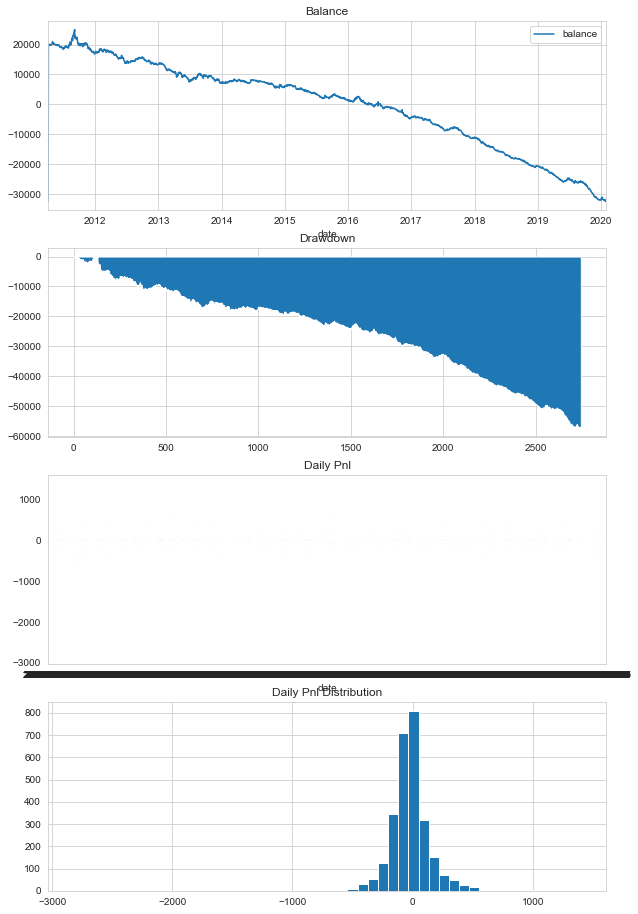

In [16]:
engine.show_chart()